<a href="https://colab.research.google.com/github/tdlinh2712/DeepLearning-with-Tensorflow/blob/master/CNN_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linh's experiment


In [3]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import tensorflow as tf

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_test = x_train/255.0, x_test / 255.0

In [5]:
x_train.shape

(50000, 32, 32, 3)

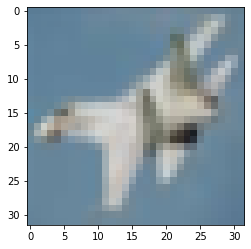

In [6]:
plt.imshow(x_test[10])

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train, y_test = y_train.flatten(), y_test.flatten()
print("y_train.shape: ", y_train.shape)

y_train.shape:  (50000,)


In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
labels = np.unique(y_train)
K = len(labels)

In [11]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras import Model

In [12]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)

#x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [13]:
# compile and fit
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 14s 7ms/step - loss: 1.3202 - accuracy: 0.5514 - val_loss: 0.9957 - val_accuracy: 0.6524
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8457 - accuracy: 0.7046 - val_loss: 0.8883 - val_accuracy: 0.7079
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6922 - accuracy: 0.7593 - val_loss: 0.7507 - val_accuracy: 0.7411
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5881 - accuracy: 0.7984 - val_loss: 0.7417 - val_accuracy: 0.7576
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5037 - accuracy: 0.8293 - val_loss: 0.6622 - val_accuracy: 0.7860
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4240 - accuracy: 0.8533 - val_loss: 0.6072 - val_accuracy: 0.8041
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3618 - accuracy: 0.8756 - val_loss: 0.5850 - val_

In [ ]:
# fit with data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0]
r = model.fit_generator(train_generator, validation_data=(x_test, y_test),
                        steps_per_epoch= steps_per_epoch,
                        epochs=50)


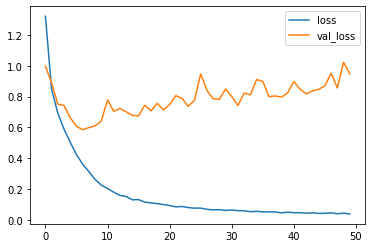

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

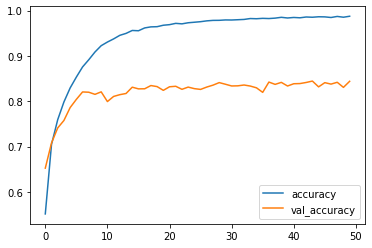

In [15]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [16]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.9462 - accuracy: 0.8440
[0.9462394714355469, 0.843999981880188]


In [17]:
print(model.layers)

[<keras.engine.input_layer.InputLayer object at 0x7fd5bdc6eb10>, <keras.layers.convolutional.Conv2D object at 0x7fd5bdc74150>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fd5be0fec50>, <keras.layers.convolutional.Conv2D object at 0x7fd5bd3ec0d0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fd5b00e01d0>, <keras.layers.pooling.MaxPooling2D object at 0x7fd5be0fe3d0>, <keras.layers.convolutional.Conv2D object at 0x7fd5b00c0190>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fd5b004d2d0>, <keras.layers.convolutional.Conv2D object at 0x7fd5b0051f50>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fd5b004d1d0>, <keras.layers.pooling.MaxPooling2D object at 0x7fd5b0061910>, <keras.layers.convolutional.Conv2D object at 0x7fd5bdc3c310>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fd5b0057c50>, <keras.layers.convolutional.Con

In [18]:
y_hat = np.argmax(model.predict(x_test), axis=1)

In [19]:
#plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

tf.math.confusion_matrix(y_test, y_hat)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[900,   8,  29,   6,   7,   7,   8,   4,  16,  15],
       [ 11, 932,   1,   2,   1,   3,   1,   2,  10,  37],
       [ 54,   1, 776,  27,  43,  44,  39,   8,   2,   6],
       [ 22,   3,  47, 685,  28, 142,  35,  18,   9,  11],
       [ 11,   3,  45,  47, 811,  31,  28,  22,   2,   0],
       [  6,   1,  34,  90,  24, 817,   8,  19,   0,   1],
       [  5,   4,  33,  36,  14,  20, 877,   5,   3,   3],
       [ 17,   0,  10,  29,  28,  41,   3, 864,   0,   8],
       [ 53,  15,  11,  11,   0,   3,   2,   2, 888,  15],
       [ 20,  55,   5,   7,   2,   2,   3,   5,  11, 890]], dtype=int32)>

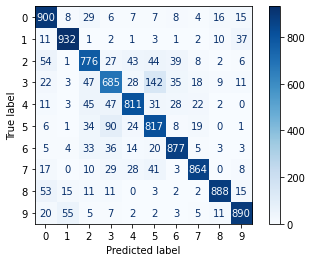

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_hat,  cmap='Blues')

Text(0.5, 1.0, 'True label: ship Predicted as: plane')

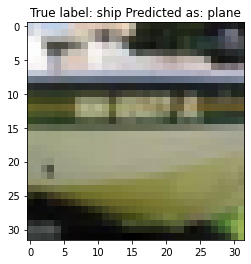

In [27]:
#plot misclassified examples
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
misclassified_idx = np.where(y_hat != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted as: %s" % (classes[y_test[i]], classes[y_hat[i]]))